In [97]:
import sys
# FOLDER_PATH_EASYPLOT = r'C:\Users\wande\Documents\GitHub\EASYPLOT_TOOLBOOXdev\easyplot_toolbox'
FOLDER_PATH_EASYPLOT = r'/home/nero/git-hub projects/EASYPLOTPYDEV/easyplot_toolbox/easyplot.py'
sys.path.append(FOLDER_PATH_EASYPLOT)

from easyplot_toolbox.easyplot import *
import pandas as pd
import numpy as np
import os

In [98]:
# df = pd.read_excel('exemplos_flexao/Resultados experimentais de flexão.xlsx')
df = pd.read_excel('exemplos_flexao/Resultados do modelo analíico.xlsx')
df.head()

Unnamed: 0 Unnamed: 1  Unnamed: 2  \
0                         NaN        NaN         NaN   
1                         NaN        NaN         NaN   
2                         NaN        NaN         NaN   
3                         NaN        NaN         NaN   
4  Experimental Data - F-05-2        NaN         NaN   

                     Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0                           NaN        NaN         NaN   
1                           NaN        NaN         NaN   
2                           NaN        NaN         NaN   
3                           NaN        NaN         NaN   
4  Simulação Analítica - F-05-2        NaN         NaN   

                   Unnamed: 6 Unnamed: 7  Unnamed: 8  \
0                         NaN        NaN         NaN   
1                         NaN        NaN         NaN   
2                         NaN        NaN         NaN   
3                         NaN        NaN         NaN   
4  Experimental Data - F15-02        NaN         NaN   

                     Unnamed: 9 Unnamed: 10  
0                           NaN         NaN  
1                           NaN         NaN  
2                           NaN         NaN  
3                           NaN         NaN  
4  Simulação Analítica - F-15-2         NaN

In [99]:
# df_extraido = df.iloc[:, [2, 3, 6, 7, 10, 11, 13, 14]]
# df_extraido = df.iloc[:, [19, 20, 23, 24, 27, 28, 30, 31]]
# df_extraido = df.iloc[:, [0, 1, 3, 4]]
df_extraido = df.iloc[:, [6, 7, 9, 10]]
df_extraido

Unnamed: 6   Unnamed: 7                    Unnamed: 9  \
0                            NaN          NaN                           NaN   
1                            NaN          NaN                           NaN   
2                            NaN          NaN                           NaN   
3                            NaN          NaN                           NaN   
4     Experimental Data - F15-02          NaN  Simulação Analítica - F-15-2   
...                          ...          ...                           ...   
1002                     3.99404  38147.27954                           NaN   
1003                     3.99806  37856.89463                           NaN   
1004                     4.00207  37480.87954                           NaN   
1005                     4.00609  37104.86446                           NaN   
1006                      4.0101  36728.84937                           NaN   

     Unnamed: 10  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1002         NaN  
1003         NaN  
1004         NaN  
1005         NaN  
1006         NaN  

[1007 rows x 4 columns]

In [100]:
df_extraido = df_extraido.iloc[6:].reset_index(drop=True)

# Renomear as colunas com base nos valores da primeira linha
novos_nomes = df_extraido.iloc[0]  # Obtém a primeira linha como os novos nomes das colunas
df_extraido.columns = novos_nomes  # Define os novos nomes das colunas

# Remover a primeira linha (que continha os nomes originais das colunas)
df_extraido = df_extraido.drop(0)

# Resetar os índices após a remoção da primeira linha
df_extraido = df_extraido.reset_index(drop=True)
df_extraido

0   Deflection         Load Deflection     Load
0            0     26.14589          0        0
1      0.00401   2008.41906   0.004888   2968.2
2      0.00803   4085.31792   0.009775   5936.4
3      0.01204   6008.72331   0.014663   8904.6
4      0.01606   7994.11058    0.01955  11872.8
..         ...          ...        ...      ...
995    3.99404  38147.27954        NaN      NaN
996    3.99806  37856.89463        NaN      NaN
997    4.00207  37480.87954        NaN      NaN
998    4.00609  37104.86446        NaN      NaN
999     4.0101  36728.84937        NaN      NaN

[1000 rows x 4 columns]

In [101]:
novos_nomes = []
contador_x = 0
contador_y = 0

df_pronto = df_extraido.copy()

# for coluna in df_pronto.columns:
#     if 'Deformação(mm)' in coluna or 'def' in coluna:
#         novos_nomes.append(f'x{contador_x}')
#         contador_x += 1
#     elif 'Força(N)' in coluna or 'força' in coluna:
#         novos_nomes.append(f'y{contador_y}')
#         contador_y += 1
#     else:
#         novos_nomes.append(coluna)

for coluna in df_pronto.columns:
    if 'Deflection' in coluna:
        novos_nomes.append(f'x{contador_x}')
        contador_x += 1
    elif 'Load' in coluna:
        novos_nomes.append(f'y{contador_y}')
        contador_y += 1
df_pronto.columns = novos_nomes
df_pronto


x0           y0        x1       y1
0          0     26.14589         0        0
1    0.00401   2008.41906  0.004888   2968.2
2    0.00803   4085.31792  0.009775   5936.4
3    0.01204   6008.72331  0.014663   8904.6
4    0.01606   7994.11058   0.01955  11872.8
..       ...          ...       ...      ...
995  3.99404  38147.27954       NaN      NaN
996  3.99806  37856.89463       NaN      NaN
997  4.00207  37480.87954       NaN      NaN
998  4.00609  37104.86446       NaN      NaN
999   4.0101  36728.84937       NaN      NaN

[1000 rows x 4 columns]

In [102]:
colunas_y = [coluna for coluna in df_pronto.columns if coluna.startswith('y')]

df_pronto[colunas_y] /= 1000
df_pronto

x0         y0        x1       y1
0          0   0.026146         0      0.0
1    0.00401   2.008419  0.004888   2.9682
2    0.00803   4.085318  0.009775   5.9364
3    0.01204   6.008723  0.014663   8.9046
4    0.01606   7.994111   0.01955  11.8728
..       ...        ...       ...      ...
995  3.99404   38.14728       NaN      NaN
996  3.99806  37.856895       NaN      NaN
997  4.00207   37.48088       NaN      NaN
998  4.00609  37.104864       NaN      NaN
999   4.0101  36.728849       NaN      NaN

[1000 rows x 4 columns]

In [103]:
dict = df_pronto.to_dict('list')
dict

{'x0': [0,
  0.00401,
  0.00803,
  0.01204,
  0.01606,
  0.02007,
  0.02408,
  0.0281,
  0.03211,
  0.03613,
  0.04014,
  0.04416,
  0.04817,
  0.05218,
  0.0562,
  0.06021,
  0.06423,
  0.06824,
  0.07225,
  0.07627,
  0.08028,
  0.0843,
  0.08831,
  0.09232,
  0.09634,
  0.10035,
  0.10437,
  0.10838,
  0.1124,
  0.11641,
  0.12042,
  0.12444,
  0.12845,
  0.13247,
  0.13648,
  0.14049,
  0.14451,
  0.14852,
  0.15254,
  0.15655,
  0.16056,
  0.16458,
  0.16859,
  0.17261,
  0.17662,
  0.18064,
  0.18465,
  0.18866,
  0.19268,
  0.19669,
  0.20071,
  0.20472,
  0.20873,
  0.21275,
  0.21676,
  0.22078,
  0.22479,
  0.2288,
  0.23282,
  0.23683,
  0.24085,
  0.24486,
  0.24888,
  0.25289,
  0.2569,
  0.26092,
  0.26493,
  0.26895,
  0.27296,
  0.27697,
  0.28099,
  0.285,
  0.28902,
  0.29303,
  0.29704,
  0.30106,
  0.30507,
  0.30909,
  0.3131,
  0.31712,
  0.32113,
  0.32514,
  0.32916,
  0.33317,
  0.33719,
  0.3412,
  0.34521,
  0.34923,
  0.35324,
  0.35726,
  0.36127,
  0.36528

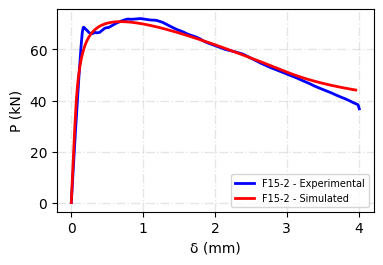

In [104]:
# Chart setup
CHART_CONFIG = {
                'name': 'grafico_analitico_2',
                'width': 10.0, 
                'height': 7.0,
                'extension': 'png',
                'dots per inch': 600, 
                'marker': [None, None],
                'marker size': [None, None],
                'line width': [2, 2],
                'line style': ['-', '-'],
                'x axis label': 'δ (mm)',
                'x axis size': 10,
                'y axis label': 'P (kN)',
                'y axis size': 10,
                'axises color': 'black',
                'labels size': 10,
                'labels color': 'black',
                'chart color': ['blue', 'red'],
                'on grid?': True,
                'legend': ['F15-2 - Experimental', 'F15-2 - Simulated'], 
                'legend location': 'lower right',
                'x limit': None,
                'y limit': None,
                'size legend': 7,
                'y log': False,
                'x log': False,
            }


# Call function
line_chart(dataset = dict, plot_setup = CHART_CONFIG)